In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv("scrap price.csv")

In [4]:
df.head()
# df.shape

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

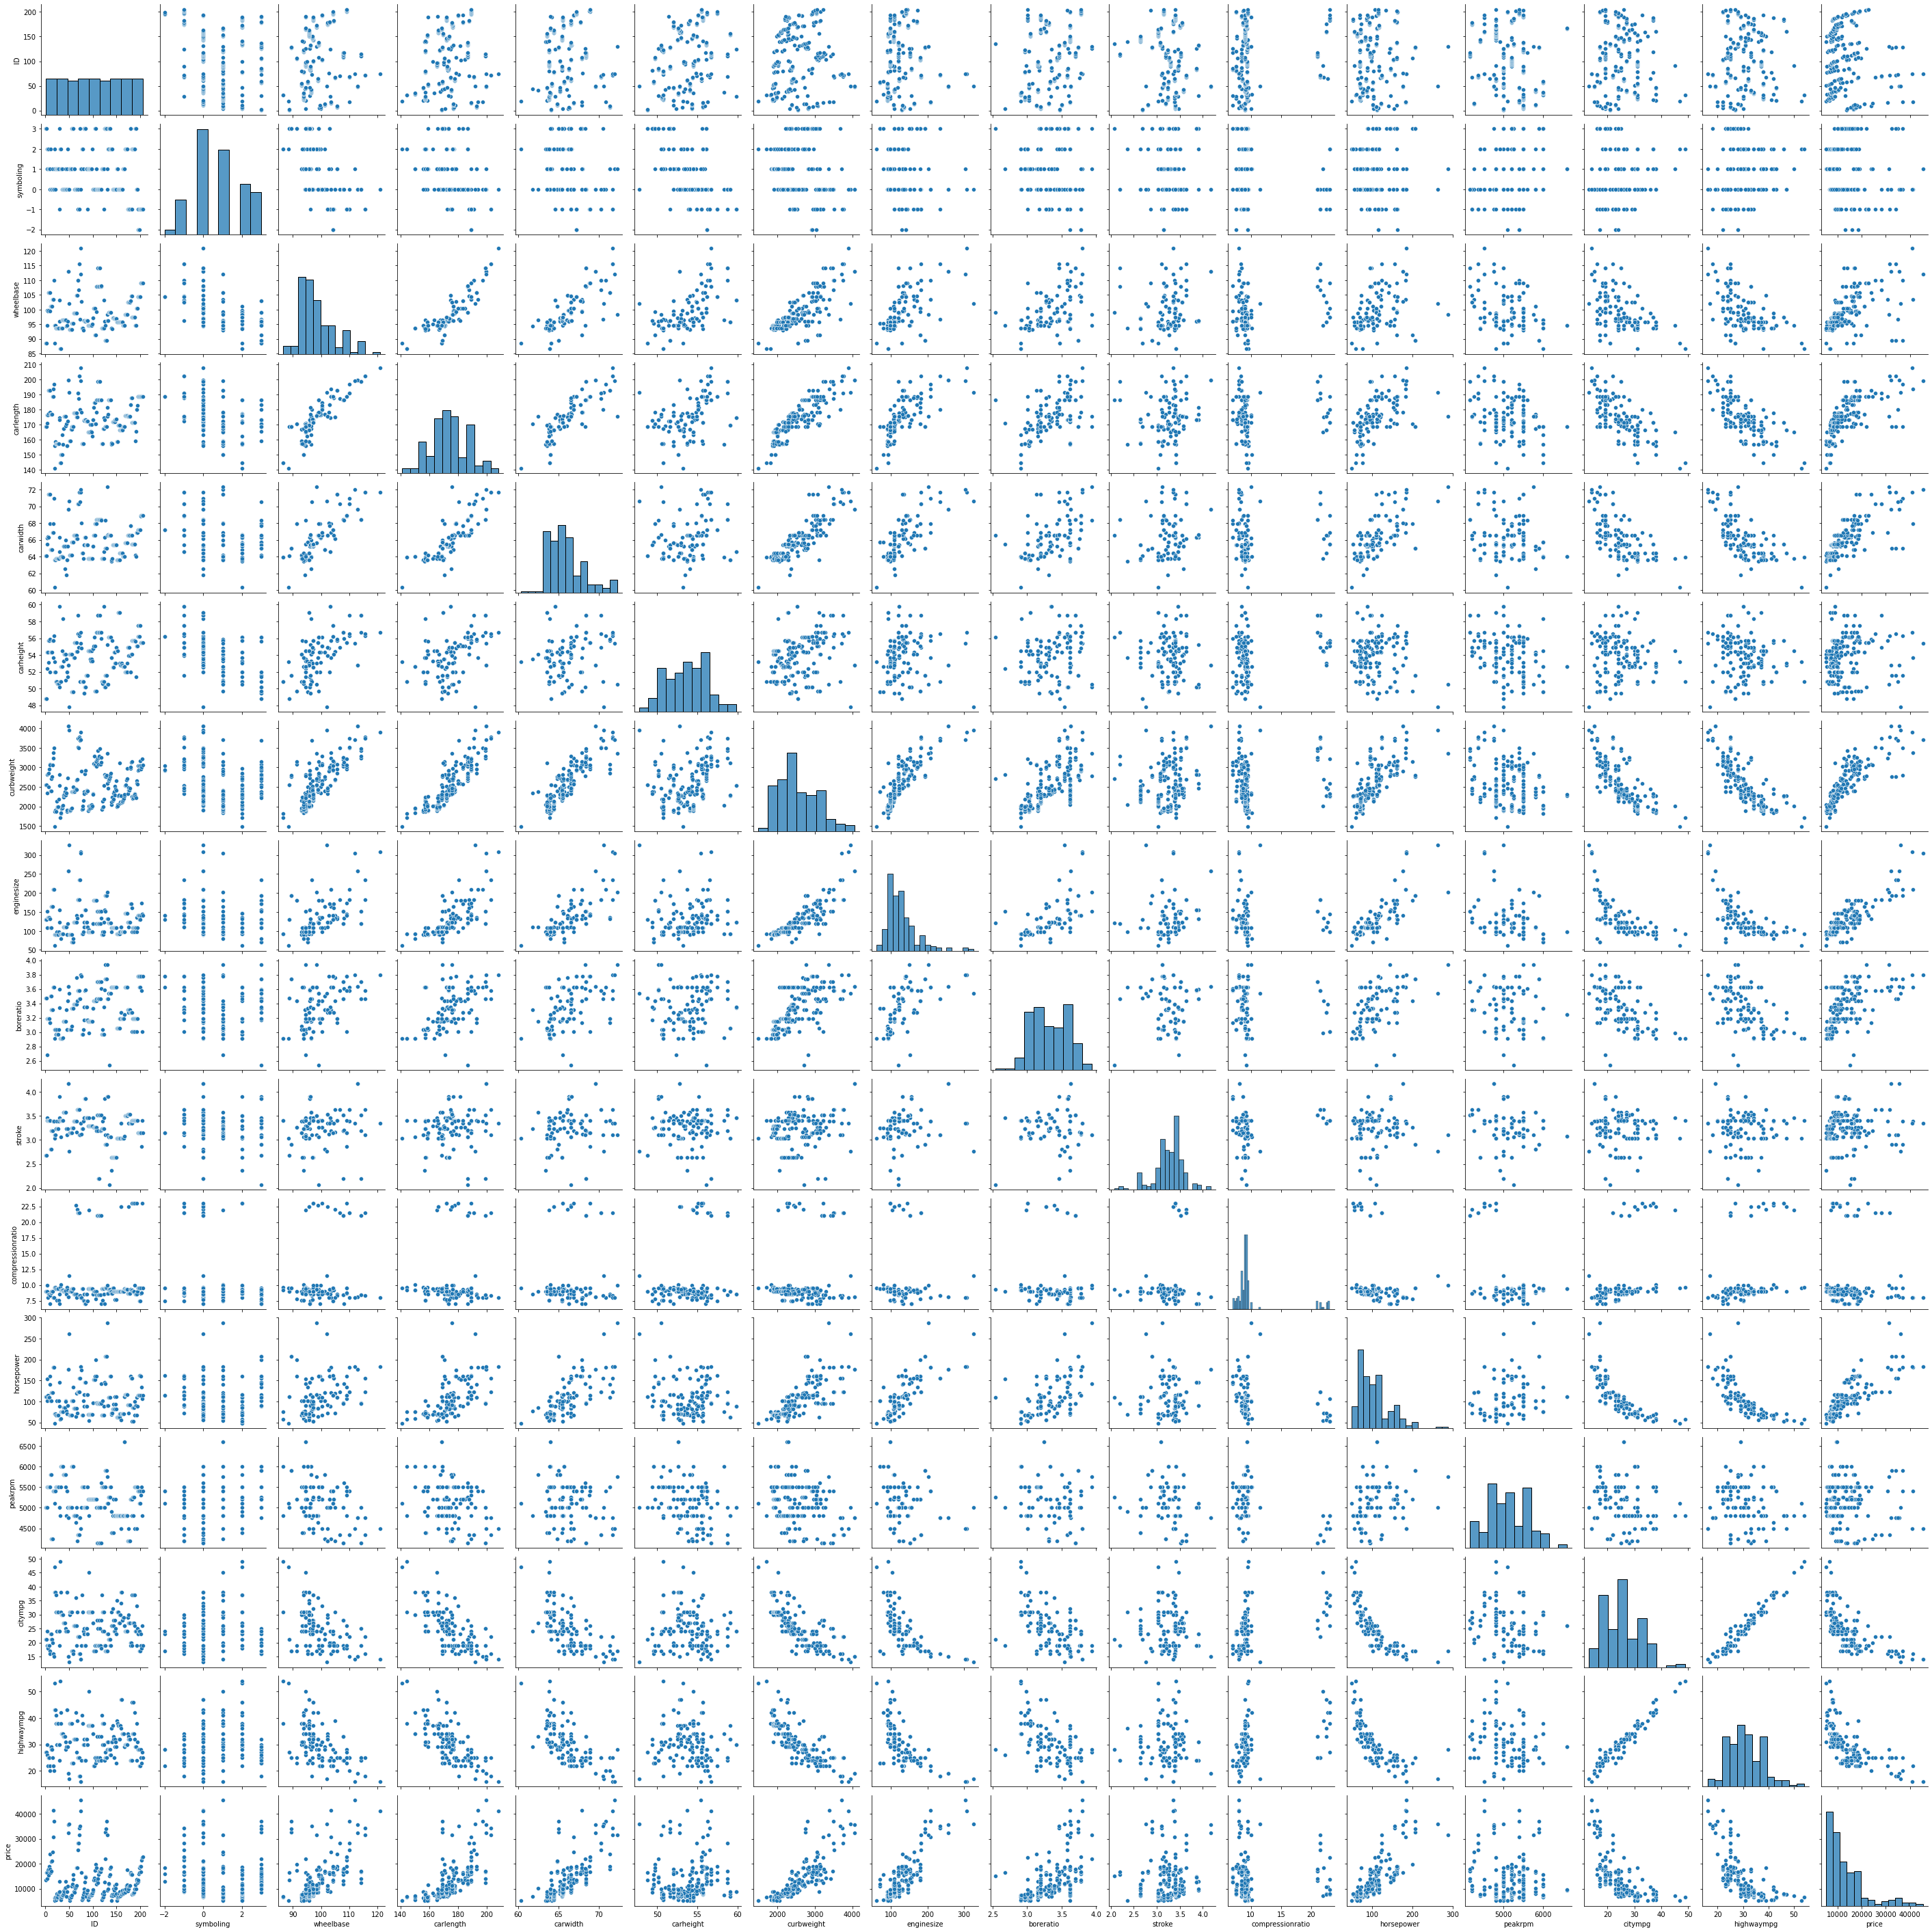

In [6]:
sns.pairplot(df)

#### From pairplot with respect to price : wheelbase ,carlength , carwidth , curbweight, enginesize, horsepower has positive correlations and citympg and highwaympg has negative correlation 

<AxesSubplot:xlabel='fueltypes', ylabel='price'>

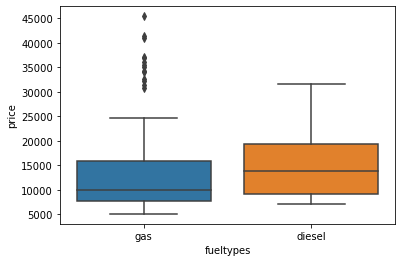

In [7]:
sns.boxplot(x='fueltypes',y='price',data=df)

<AxesSubplot:xlabel='fueltypes', ylabel='price'>

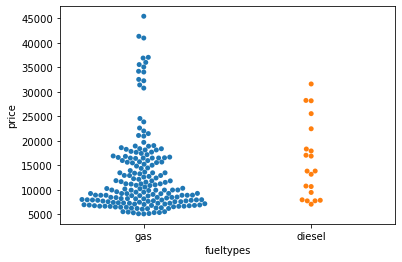

In [8]:
# plt.figure(figsize=(10,10))
sns.swarmplot(x='fueltypes',y='price',data=df)

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

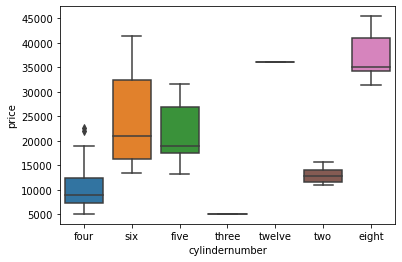

In [9]:
sns.boxplot(x='cylindernumber',y='price',data=df)

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

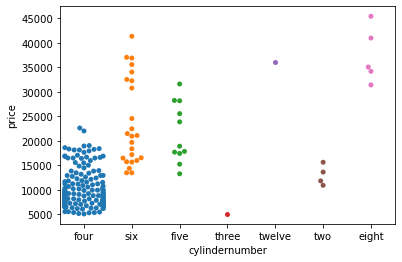

In [10]:
sns.swarmplot(x='cylindernumber',y='price',data=df)

In [11]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

<AxesSubplot:xlabel='aspiration', ylabel='price'>

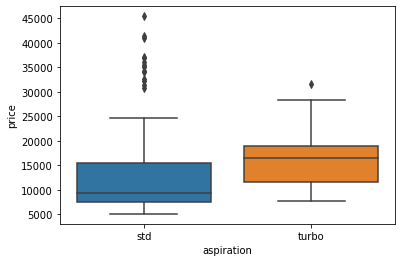

In [12]:
sns.boxplot(x='aspiration',y='price',data=df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

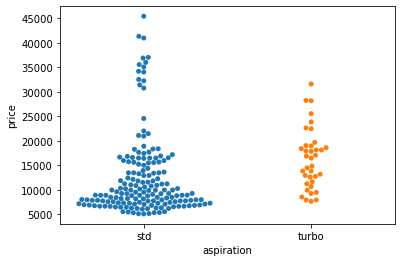

In [13]:
sns.swarmplot(x='aspiration',y='price',data=df)

<AxesSubplot:xlabel='doornumbers', ylabel='price'>

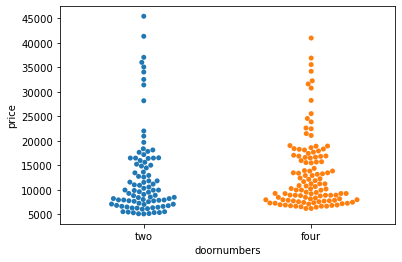

In [14]:
sns.swarmplot(x='doornumbers',y='price',data=df)

<AxesSubplot:xlabel='doornumbers', ylabel='price'>

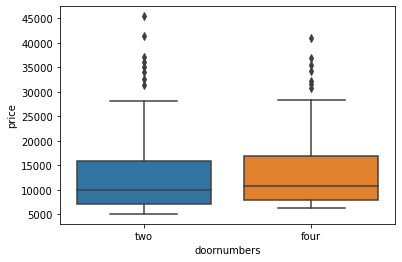

In [15]:
sns.boxplot(x='doornumbers',y='price',data=df)

<AxesSubplot:xlabel='carbody', ylabel='price'>

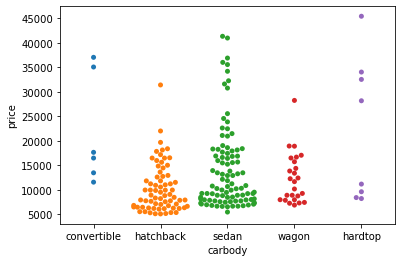

In [16]:
sns.swarmplot(x='carbody',y='price',data=df)

<AxesSubplot:xlabel='carbody', ylabel='price'>

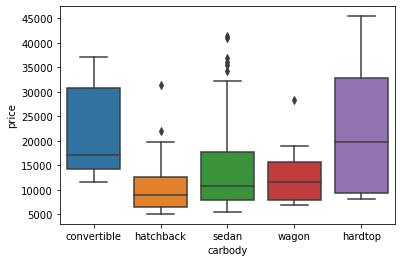

In [17]:
sns.boxplot(x='carbody',y='price',data=df)

<AxesSubplot:xlabel='drivewheels', ylabel='price'>

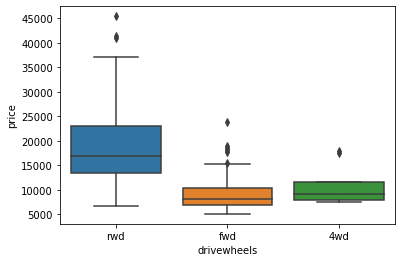

In [18]:
sns.boxplot(x='drivewheels',y='price',data=df)

<AxesSubplot:xlabel='drivewheels', ylabel='price'>

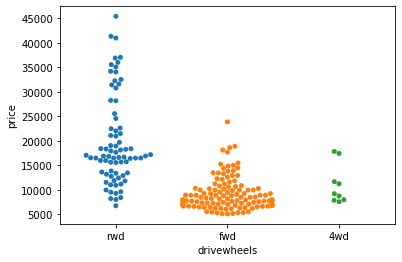

In [19]:
sns.swarmplot(x='drivewheels',y='price',data=df)

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

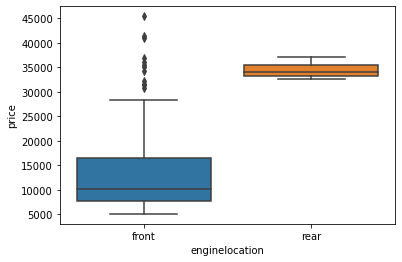

In [20]:
sns.boxplot(x='enginelocation',y='price',data=df)

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

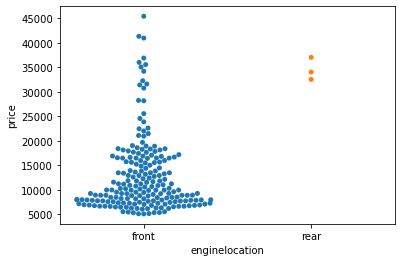

In [21]:
sns.swarmplot(x='enginelocation',y='price',data=df)

<AxesSubplot:xlabel='enginetype', ylabel='price'>

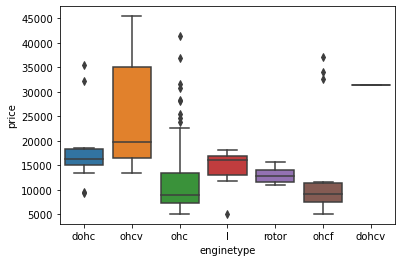

In [22]:
sns.boxplot(x='enginetype',y='price',data=df)

<AxesSubplot:xlabel='enginetype', ylabel='price'>

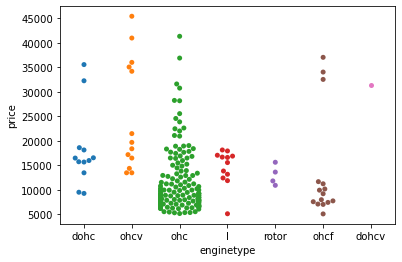

In [23]:
sns.swarmplot(x='enginetype',y='price',data=df)

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

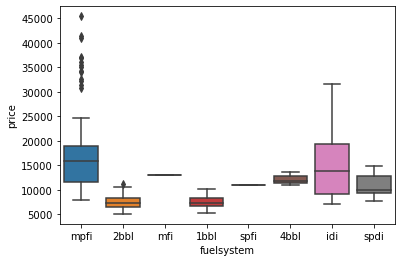

In [24]:
sns.boxplot(x='fuelsystem',y='price',data=df)

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

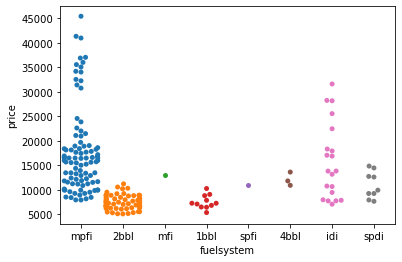

In [25]:
sns.swarmplot(x='fuelsystem',y='price',data=df)

In [26]:
df_object=df.select_dtypes(include=['object']).columns
df_object=df[df_object]

In [27]:
df_object=df_object.drop(['name','doornumbers','enginelocation'],axis=1)
df_object

,fueltypes,aspiration,carbody,drivewheels,enginetype,cylindernumber,fuelsystem
0,gas,std,convertible,rwd,dohc,four,mpfi
1,gas,std,convertible,rwd,dohc,four,mpfi
2,gas,std,hatchback,rwd,ohcv,six,mpfi
3,gas,std,sedan,fwd,ohc,four,mpfi
4,gas,std,sedan,4wd,ohc,five,mpfi
...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four,mpfi
201,gas,turbo,sedan,rwd,ohc,four,mpfi
202,gas,std,sedan,rwd,ohcv,six,mpfi
203,diesel,turbo,sedan,rwd,ohc,six,idi


In [28]:
dummies=pd.get_dummies(df_object,drop_first=True)

In [29]:
df_final=pd.concat([df,dummies],axis=1)

In [30]:
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [31]:
df_final=df_final.drop(df_object,axis=1)

In [32]:
df_final=df_final.drop(['ID','name','doornumbers','enginelocation'],axis=1)

In [33]:
df_final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_final=df_final.drop(['boreratio','stroke','compressionratio','carheight','peakrpm','price'],axis=1)

In [35]:
X=df_final

In [36]:
y=df['price']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

num=['symboling','wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg']


In [38]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train[num]=scaler.fit_transform(X_train[num])
X_test[num]=scaler.transform(X_test[num])

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred=lr.predict(X_test)

In [42]:
y_test

160     7738.0
186     8495.0
59      8845.0
165     9298.0
140     7603.0
        ...   
28      8921.0
29     12964.0
182     7775.0
40     10295.0
128    37028.0
Name: price, Length: 62, dtype: float64

In [43]:
# r2_score
r2=r2_score(y_test,y_pred)
r2

0.8608681073749427

In [44]:
X_test.shape

(62, 36)

In [45]:
# Adjusted r2_score
1-(((1-r2)*80)/(45))

0.7526544131110092